<a href="https://colab.research.google.com/github/bmijangos/ProyectoIntegrador/blob/main/Actividad1_equipo21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# conectamos al drive de google para la lectura de los archivos csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   # para un mejor despliegue de los gráficos

In [3]:

# Lectura de los archivos csv
file_path = '/content/drive/MyDrive/DataSetProyecto/GrupalTodo.csv'

label = ["IdCliente","FechaAltaCliente","CodigoGrupo","EdadCliente","Genero","EstadoCivil","Escolaridad","CapacidadPago","Localidad","CodigoSucursal","CodigoASesor","NumeroCredito","CicloCliente","FechaDesembolso","FechaVencimiento","FechaCancelacion","Plazo","PeriodoPago","EstatusCredito","MontoCredito","CuotaNumero","CuotaFechaVencimiento","CuotaFechaCancelacion","MontoCuota","MontoCapital","SaldoCapital","EstatusCuota","DiasAtraso"]

# Obtenemos el dataframe
pagos_df = pd.read_csv(file_path, names=label)

pagos_df.shape


(4254537, 28)

In [4]:
# Agregamos los datos del segundo archivo de castigos
file_path = '/content/drive/MyDrive/DataSetProyecto/GrupalTodoCastigos.csv'

castigos_df = pd.read_csv(file_path)

castigos_df.shape

(127677, 28)

In [5]:
# unimos los dos dataframes en uno solo
grupal_df = pd.concat([pagos_df, castigos_df], axis=0)

In [10]:
grupal_df.shape

NameError: name 'grupal_df' is not defined

¿Hay valores faltantes en el conjunto de datos?
Si existen valores nulos los cuales representan menos del 0.01 porciento del total de la base de datos por lo que se decide eliminar

¿Se pueden identificar patrones de ausencia?
Se decide eliminar los registros faltantes por no ser representativo para la muestra


In [7]:
grupal_df.isnull().values.any()

True

In [8]:
grupal_df.isnull().sum()

IdCliente                   0
FechaAltaCliente            0
CodigoGrupo                 0
EdadCliente                 0
Genero                      0
EstadoCivil                 0
Escolaridad              1243
CapacidadPago               0
Localidad                   0
CodigoSucursal              0
CodigoASesor                0
NumeroCredito               0
CicloCliente                0
FechaDesembolso             0
FechaVencimiento            0
FechaCancelacion            0
Plazo                       0
PeriodoPago                 0
EstatusCredito              0
MontoCredito                0
CuotaNumero                 0
CuotaFechaVencimiento       0
CuotaFechaCancelacion     128
MontoCuota                  0
MontoCapital                0
SaldoCapital                0
EstatusCuota                0
DiasAtraso                128
dtype: int64

In [9]:
# eliminamos los valores nulos
gpdf = grupal_df.dropna()

In [25]:
gpdf.isnull().values.any()

False

¿Cuáles son las estadísticas resumidas del conjunto de datos?

In [11]:
print(gpdf.describe(exclude=[object]))

          IdCliente   CodigoGrupo   EdadCliente   EstadoCivil  CapacidadPago  \
count  4.380844e+06  4.380844e+06  4.380844e+06  4.380844e+06   4.380844e+06   
mean   5.902005e+04  8.415457e+02  4.615864e+01  3.268472e+00   7.633413e+03   
std    3.836093e+04  5.770191e+02  1.334739e+01  1.669057e+00   3.069242e+04   
min    4.000000e+00  0.000000e+00  1.900000e+01  1.000000e+00  -6.391200e+06   
25%    2.367200e+04  3.130000e+02  3.600000e+01  2.000000e+00   2.400000e+03   
50%    5.530600e+04  8.230000e+02  4.500000e+01  3.000000e+00   6.000000e+03   
75%    9.229100e+04  1.244000e+03  5.500000e+01  5.000000e+00   1.017600e+04   
max    1.376940e+05  2.594000e+03  1.130000e+02  7.000000e+00   8.000400e+06   

          Localidad  CodigoSucursal  NumeroCredito  CicloCliente  \
count  4.380844e+06    4.380844e+06   4.380844e+06  4.380844e+06   
mean   7.607020e+03    6.142390e+00   6.143053e+09  5.265920e+00   
std    3.124029e+03    4.096959e+00   4.096748e+09  4.991101e+00   
min    

In [12]:
print(gpdf.Genero.describe())
print(gpdf.Escolaridad.describe())
print(gpdf.PeriodoPago.describe())
print(gpdf.EstatusCredito.describe())

count     4380844
unique          2
top             F
freq      4378507
Name: Genero, dtype: object
count     4380844
unique         14
top            1A
freq      1302653
Name: Escolaridad, dtype: object
count          4380844
unique               3
top       CATORCENA(S)
freq           3816897
Name: PeriodoPago, dtype: object
count     4380844
unique          2
top           CAN
freq      4253254
Name: EstatusCredito, dtype: object


In [13]:
gpdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380844 entries, 0 to 127676
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   IdCliente              int64  
 1   FechaAltaCliente       object 
 2   CodigoGrupo            int64  
 3   EdadCliente            int64  
 4   Genero                 object 
 5   EstadoCivil            int64  
 6   Escolaridad            object 
 7   CapacidadPago          float64
 8   Localidad              int64  
 9   CodigoSucursal         int64  
 10  CodigoASesor           object 
 11  NumeroCredito          int64  
 12  CicloCliente           int64  
 13  FechaDesembolso        object 
 14  FechaVencimiento       object 
 15  FechaCancelacion       object 
 16  Plazo                  int64  
 17  PeriodoPago            object 
 18  EstatusCredito         object 
 19  MontoCredito           float64
 20  CuotaNumero            int64  
 21  CuotaFechaVencimiento  object 
 22  CuotaFechaCancelacion  o

In [14]:
print(gpdf.head())

   IdCliente         FechaAltaCliente  CodigoGrupo  EdadCliente Genero  \
0        261  2004-02-16 00:00:00.000           56           40      F   
1      30654  2004-02-01 00:00:00.000         1223           65      F   
2        264  2004-02-16 00:00:00.000           57           68      F   
3        263  2004-02-16 00:00:00.000           56           71      F   
4        261  2004-02-16 00:00:00.000           56           40      F   

   EstadoCivil Escolaridad  CapacidadPago  Localidad  CodigoSucursal  ...  \
0            2          1A            0.0       7181               1  ...   
1            3          7A            0.0       7086               1  ...   
2            5          7A            0.0       7181               1  ...   
3            5          7A            0.0       7181               1  ...   
4            2          1A            0.0       7181               1  ...   

  EstatusCredito  MontoCredito  CuotaNumero    CuotaFechaVencimiento  \
0            CAN    

¿Hay valores atípicos en el conjunto de datos?

Se detecto que la variable "EdadCliente" hay datos atipicos con mas de 80 años, esto se debe que al momento de la consulta de la informacion se obtuvo el dato comparando la fecha de nacimiento con la fecha actual, cuando se debio tomar la fecha del desembolso que es el dato mas real, para continuar con la exploracion de los datos se procede a eliminar dichos registros.

In [31]:
# se eliminar los registros de clientes con mas de 80 años

gpdf.drop( gpdf[gpdf['EdadCliente'] > 80].index, axis=0, inplace=True)

<ipython-input-31-a779e5281e75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf.drop( gpdf[gpdf['EdadCliente'] > 80].index, axis=0, inplace=True)


In [9]:
# analisis de las siguientes variables
newgpdf = gpdf[['IdCliente','EdadCliente','CicloCliente','Plazo','MontoCuota','DiasAtraso','EstadoCivil','EstatusCredito']]

newgpdf.info()

NameError: name 'gpdf' is not defined

In [8]:

df = pd.DataFrame(newgpdf, columns = ['EdadCliente','CicloCliente','Plazo','EstadoCivil'])

df.boxplot()
plt.show()


NameError: name 'newgpdf' is not defined

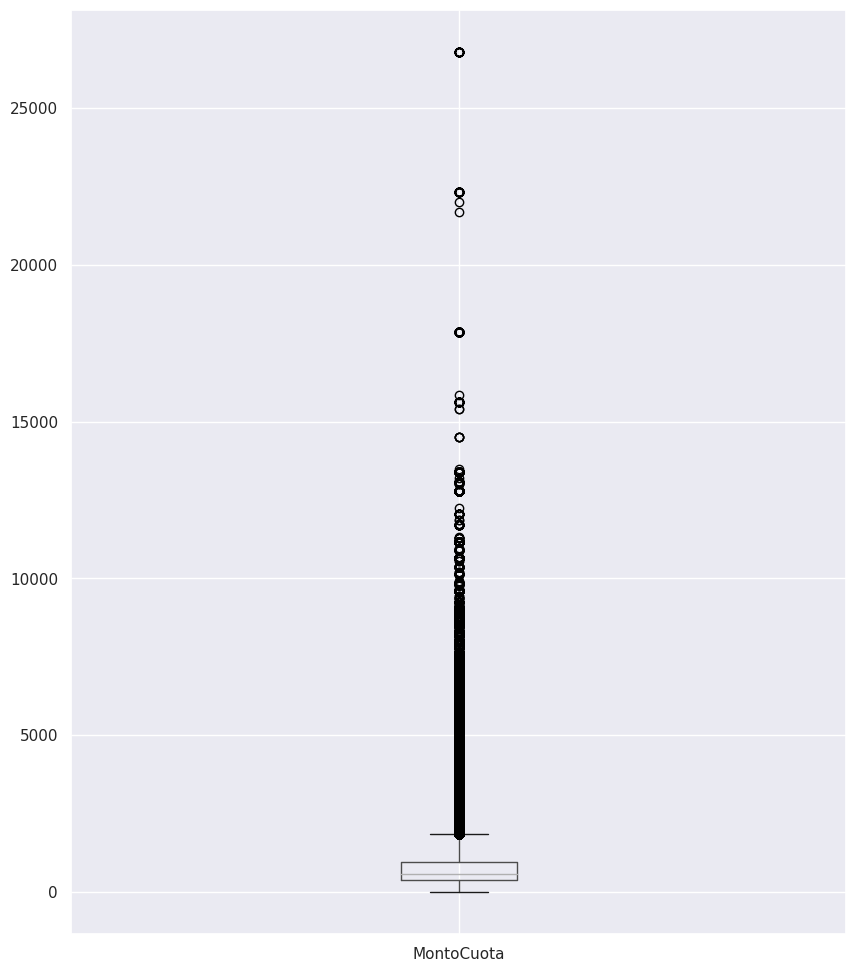

In [39]:
# graficamos la siguientes variables para identificar valores atipicos
df = pd.DataFrame(gpdf, columns = ['MontoCuota'])

df.boxplot()
plt.show()

In [17]:
sns.set(rc={'figure.figsize':(10,12)})   # (ancho-columnas, altura-renglones) Ajustemos el tamaño de la ventana
                                         # que desplegará los gráficos usando la librería de seaborn (sns).

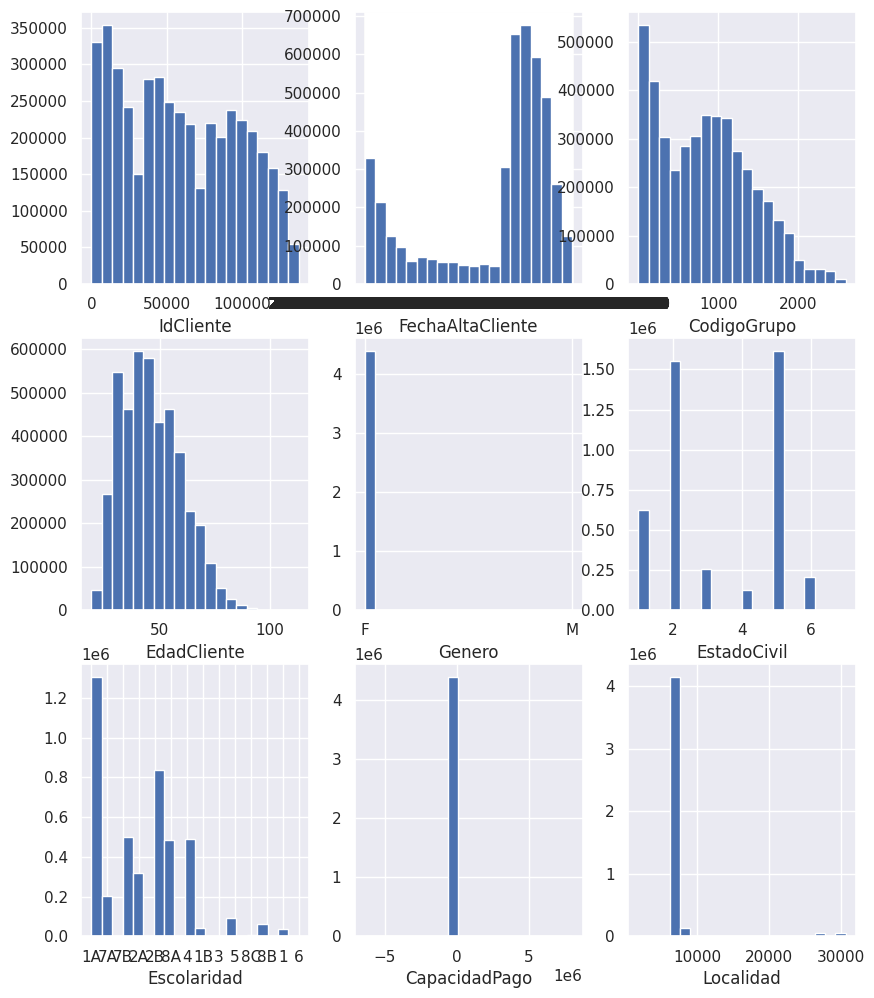

In [18]:
fig, axes = plt.subplots(3, 3)    # Definimos una ventana de 3x3 nichos para incluir en cada uno de ellos un gráfico.
for k in range(0,9):
  plt.subplot(3,3,k+1)     # Los nichos para cada histograma se numeran iniciando en 1.
  plt.hist(gpdf[gpdf.columns[k]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(gpdf.columns[k])
plt.show()

¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
¿Hay correlación entre las variables dependientes e independientes?
¿Cómo se distribuyen los datos en función de diferentes categorías?
¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
¿Se deberían normalizar las imágenes para visualizarlas mejor?
¿Hay desequilibrio en las clases de la variable objetivo?